# Miniproject 5 : PCA, KPCA and Missing Data Imputation

Due: Thursday, Novemeber 9.
Individual Submission : Please upload your jupyter notebook with results saved on One Drive. Use File Name MiniProject_XX where XX is your first name. 


In [48]:
import numpy as np
from numpy.ma.core import transpose
from numpy.linalg import svd

import pandas as pd
import random

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

from scipy.cluster import hierarchy

%matplotlib inline
plt.style.use('seaborn-white')

### Task 1: 
Recreate Fig 12.4 from the book for USArrest Data.         

Comment (4 pieces of information) on two different plots PCA visualization using two principal components with and without scaling the data.         

(Note: You can refer to the github repo I introduced at the beginning of the course.)


In [2]:
# Upload data
from google.colab import files
files.upload()

Saving USArrests.csv to USArrests.csv


{'USArrests.csv': b'"","Murder","Assault","UrbanPop","Rape"\n"Alabama",13.2,236,58,21.2\n"Alaska",10,263,48,44.5\n"Arizona",8.1,294,80,31\n"Arkansas",8.8,190,50,19.5\n"California",9,276,91,40.6\n"Colorado",7.9,204,78,38.7\n"Connecticut",3.3,110,77,11.1\n"Delaware",5.9,238,72,15.8\n"Florida",15.4,335,80,31.9\n"Georgia",17.4,211,60,25.8\n"Hawaii",5.3,46,83,20.2\n"Idaho",2.6,120,54,14.2\n"Illinois",10.4,249,83,24\n"Indiana",7.2,113,65,21\n"Iowa",2.2,56,57,11.3\n"Kansas",6,115,66,18\n"Kentucky",9.7,109,52,16.3\n"Louisiana",15.4,249,66,22.2\n"Maine",2.1,83,51,7.8\n"Maryland",11.3,300,67,27.8\n"Massachusetts",4.4,149,85,16.3\n"Michigan",12.1,255,74,35.1\n"Minnesota",2.7,72,66,14.9\n"Mississippi",16.1,259,44,17.1\n"Missouri",9,178,70,28.2\n"Montana",6,109,53,16.4\n"Nebraska",4.3,102,62,16.5\n"Nevada",12.2,252,81,46\n"New Hampshire",2.1,57,56,9.5\n"New Jersey",7.4,159,89,18.8\n"New Mexico",11.4,285,70,32.1\n"New York",11.1,254,86,26.1\n"North Carolina",13,337,45,16.1\n"North Dakota",0.8,45,44,

In [3]:
# Read in data
us_arrests = pd.read_csv('USArrests.csv')
print(us_arrests.shape)
us_arrests.head()

(50, 5)


,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
X = us_arrests.iloc[:,1:]
list(X.columns)

['Murder', 'Assault', 'UrbanPop', 'Rape']

In [5]:
# Initialize scaled and unscaled data 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled,columns = X.columns)
print(X_scaled_df.head())

X_unscaled_df = pd.DataFrame(X,columns = X.columns)
print(X_unscaled_df.head())

     Murder   Assault  UrbanPop      Rape
0  1.255179  0.790787 -0.526195 -0.003451
1  0.513019  1.118060 -1.224067  2.509424
2  0.072361  1.493817  1.009122  1.053466
3  0.234708  0.233212 -1.084492 -0.186794
4  0.281093  1.275635  1.776781  2.088814
   Murder  Assault  UrbanPop  Rape
0    13.2      236        58  21.2
1    10.0      263        48  44.5
2     8.1      294        80  31.0
3     8.8      190        50  19.5
4     9.0      276        91  40.6


In [6]:
# Create scaled and unscaled loading vectors
scaled_loadings = pd.DataFrame(PCA().fit(X_scaled_df).components_.T, index=X_scaled_df.columns, columns=['V1', 'V2', 'V3', 'V4'])
print(scaled_loadings)

unscaled_loadings = pd.DataFrame(PCA().fit(X).components_.T, index=X.columns, columns=['V1', 'V2', 'V3', 'V4'])
print(unscaled_loadings)

                V1        V2        V3        V4
Murder    0.535899  0.418181 -0.341233  0.649228
Assault   0.583184  0.187986 -0.268148 -0.743407
UrbanPop  0.278191 -0.872806 -0.378016  0.133878
Rape      0.543432 -0.167319  0.817778  0.089024
                V1        V2        V3        V4
Murder    0.041704  0.044822  0.079891  0.994922
Assault   0.995221  0.058760 -0.067570 -0.038938
UrbanPop  0.046336 -0.976857 -0.200546  0.058169
Rape      0.075156 -0.200718  0.974081 -0.072325


In [7]:
# Fit the PCA model and transform scaled and unscaled X to get the principal components
pca = PCA()
scaled_plot = pd.DataFrame(pca.fit_transform(X_scaled_df), columns=['PC1', 'PC2', 'PC3', 'PC4'], index=X.index)
print(scaled_plot)

unscaled_plot = pd.DataFrame(pca.fit_transform(X_unscaled_df), columns=['PC1', 'PC2', 'PC3', 'PC4'], index=X.index)
print(unscaled_plot)

         PC1       PC2       PC3       PC4
0   0.985566  1.133392 -0.444269  0.156267
1   1.950138  1.073213  2.040003 -0.438583
2   1.763164 -0.745957  0.054781 -0.834653
3  -0.141420  1.119797  0.114574 -0.182811
4   2.523980 -1.542934  0.598557 -0.341996
5   1.514563 -0.987555  1.095007  0.001465
6  -1.358647 -1.088928 -0.643258 -0.118469
7   0.047709 -0.325359 -0.718633 -0.881978
8   3.013042  0.039229 -0.576829 -0.096285
9   1.639283  1.278942 -0.342460  1.076797
10 -0.912657 -1.570460  0.050782  0.902807
11 -1.639800  0.210973  0.259801 -0.499104
12  1.378911 -0.681841 -0.677496 -0.122021
13 -0.505461 -0.151563  0.228055  0.424666
14 -2.253646 -0.104054  0.164564  0.017556
15 -0.796881 -0.270165  0.025553  0.206496
16 -0.750859  0.958440 -0.028369  0.670557
17  1.564818  0.871055 -0.783480  0.454728
18 -2.396829  0.376392 -0.065682 -0.330460
19  1.763369  0.427655 -0.157250 -0.559070
20 -0.486166 -1.474496 -0.609497 -0.179599
21  2.108441 -0.155397  0.384869  0.102372
22 -1.69268

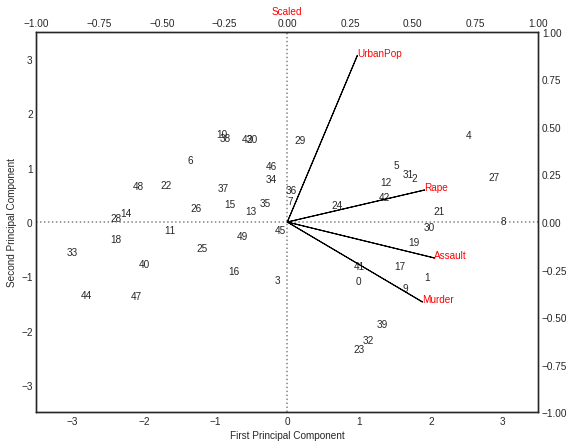

In [8]:
fig , ax1 = plt.subplots(figsize=(9,7))

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

# Plot Principal Components 1 and 2
for i in scaled_plot.index:
    ax1.annotate(i, (scaled_plot.PC1.loc[i], -scaled_plot.PC2.loc[i]), ha='center')

# Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
    
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='red')
ax2.set_xlabel('Scaled', color='red')

# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1 
for i in scaled_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (scaled_loadings.V1.loc[i]*a, -scaled_loadings.V2.loc[i]*a), color='red')

# Plot vectors
ax2.arrow(0,0,scaled_loadings.V1[0], -scaled_loadings.V2[0])
ax2.arrow(0,0,scaled_loadings.V1[1], -scaled_loadings.V2[1])
ax2.arrow(0,0,scaled_loadings.V1[2], -scaled_loadings.V2[2])
ax2.arrow(0,0,scaled_loadings.V1[3], -scaled_loadings.V2[3]);

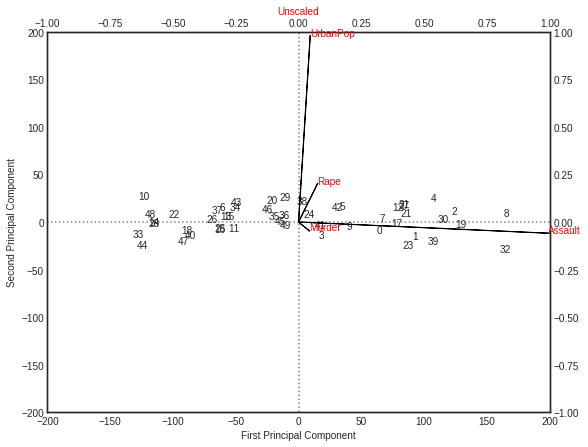

In [9]:
fig , ax1 = plt.subplots(figsize=(9,7))

ax1.set_xlim(-200,200)
ax1.set_ylim(-200,200)

# Plot Principal Components 1 and 2
for i in unscaled_plot.index:
    ax1.annotate(i, (unscaled_plot.PC1.loc[i], -unscaled_plot.PC2.loc[i]), ha='center')

# Plot reference lines
ax1.hlines(0,-200,200, linestyles='dotted', colors='grey')
ax1.vlines(0,-200,200, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
    
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='red')
ax2.set_xlabel('Unscaled', color='red')

# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1
for i in unscaled_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (unscaled_loadings.V1.loc[i]*a, -unscaled_loadings.V2.loc[i]*a), color='red')

# Plot vectors
ax2.arrow(0,0,unscaled_loadings.V1[0], -unscaled_loadings.V2[0])
ax2.arrow(0,0,unscaled_loadings.V1[1], -unscaled_loadings.V2[1])
ax2.arrow(0,0,unscaled_loadings.V1[2], -unscaled_loadings.V2[2])
ax2.arrow(0,0,unscaled_loadings.V1[3], -unscaled_loadings.V2[3]);

Above we have two principal component biplots for the USArrests data. 
Top: the same as left plot of Figure 12.4, with the variables scaled to have unit standard deviations.
Bottom: principal components using unscaled data. Assault has by far the largest loading on the first principal component because it has the highest spread among the four variables. 
In general, scaling the variables to have standard deviation one is advised.

### Task 2: 
Separating concentric circles using PCA and KPCA    

1. Create a 1000 data points of two concentric circles, and plot data points from two circles in  color red and blue.      

You can use the make_circles function from sklearn.dataset to do this.       
make_circles(n_samples, random_state, noise, factor)      
use:   n_samples = 1000, random_state = 123, noise = 0.1, factor = 0.2

In [10]:
# Generate circles
X, y = make_circles(n_samples = 1000,random_state = 123, noise = 0.1, factor = 0.2)

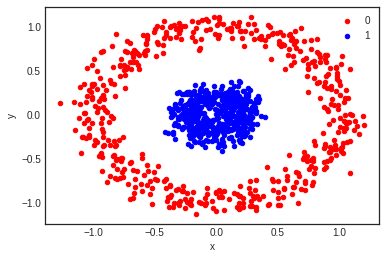

In [11]:
# Create df containing circles data
circles_df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label = y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = circles_df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
  
# Plot circles in red and blue
plt.show()

2. Do PCA on the data and visualize PC decomposition using 2 PCs. 

In [12]:
circles_df = circles_df.iloc[:,[0,1]]
circles_df.head()

,x,y
0,-0.087696,1.085978
1,-0.837558,0.547310
2,0.796843,0.411495
3,0.212158,0.106985
4,-0.053684,0.979634


In [13]:
# Form set of loading vectors
pca_loadings = pd.DataFrame(PCA().fit(scale(circles_df)).components_.T, index=circles_df.columns, columns=['V1', 'V2'])
pca_loadings

,V1,V2
x,0.707107,0.707107
y,0.707107,-0.707107


In [14]:
# Create PCA
pca = PCA()

In [15]:
# Fit the PCA model and transform scaled_X to get the principal components
circles_df_plot = pd.DataFrame(pca.fit_transform(scale(circles_df)), columns=['PC1', 'PC2'], index=circles_df.index)
circles_df_plot

,PC1,PC2
0,1.364364,-1.604856
1,-0.396493,-1.891593
2,1.649140,0.525711
3,0.434200,0.144095
4,1.265289,-1.412908
...,...,...
995,0.350742,0.161006
996,-1.460095,0.165397
997,-0.972277,1.741219
998,-1.560447,1.178619


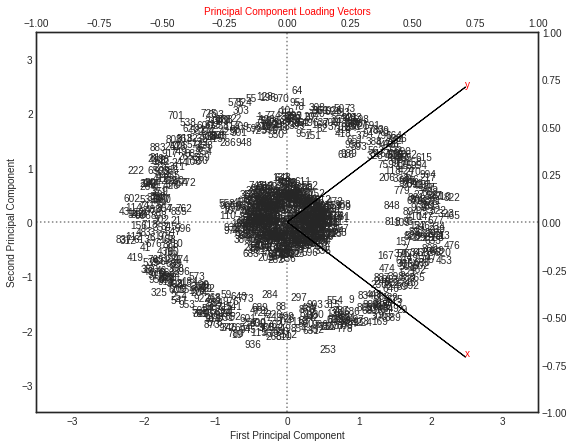

In [16]:
fig , ax1 = plt.subplots(figsize=(9,7))

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

# Plot Principal Components 1 and 2
for i in circles_df_plot.index:
    ax1.annotate(i, (circles_df_plot.PC1.loc[i], -circles_df_plot.PC2.loc[i]), ha='center')

# Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
    
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='red')
ax2.set_xlabel('Principal Component Loading Vectors', color='red')

# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color='red')

# Plot vectors
ax2.arrow(0,0,pca_loadings.V1[0], -pca_loadings.V2[0])
ax2.arrow(0,0,pca_loadings.V1[1], -pca_loadings.V2[1]);

3. Implement Kernel PCA using RBF kernel.      
You can use KernelPCA from sklearn.decomposition

In [17]:
from sklearn.decomposition import KernelPCA

4. Do KPCA visualization using two Kernel PCs and compare with Linear PCA visualization. You might want to try with different gamma for RBF. For example, case1: Gamma = 5, case2: Gamma = 15.    

In [18]:
kpca1 = KernelPCA(n_components=2, kernel='rbf', gamma=5)

# Fit the PCA model and transform df to get the principal components
kpca1_df_plot = pd.DataFrame(kpca1.fit_transform(circles_df), columns=['PC1', 'PC2'], index=circles_df.index)
kpca1_df_plot

,PC1,PC2
0,-0.419915,0.065825
1,-0.422473,-0.066478
2,-0.393311,0.228851
3,0.434001,0.550982
4,-0.420901,0.086296
...,...,...
995,0.483518,0.488235
996,-0.334049,-0.292262
997,-0.427270,-0.022492
998,-0.431335,-0.088843


Text(0, 0.5, 'Second Principal Component')

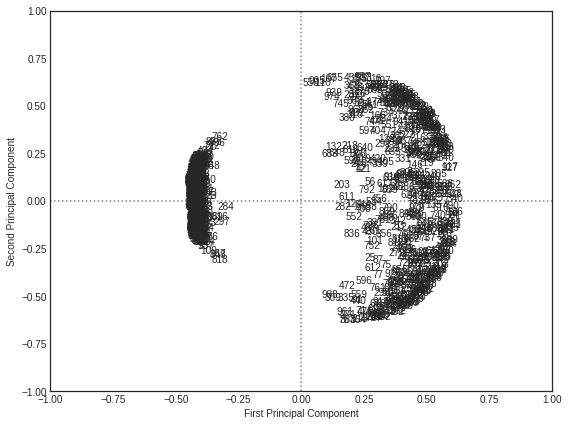

In [19]:
fig , ax1 = plt.subplots(figsize=(9,7))

ax1.set_xlim(-1,1)
ax1.set_ylim(-1,1)

# Plot Principal Components 1 and 2
for i in kpca1_df_plot.index:
    ax1.annotate(i, (kpca1_df_plot.PC1.loc[i], -kpca1_df_plot.PC2.loc[i]), ha='center')

# Plot reference lines
ax1.hlines(0,-1,1, linestyles='dotted', colors='grey')
ax1.vlines(0,-1,1, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')

In [20]:
kpca2 = KernelPCA(n_components=2, kernel='rbf', gamma=15)

In [21]:
# Fit the PCA model and transform df to get the principal components
kpca2_df_plot = pd.DataFrame(kpca2.fit_transform(circles_df), columns=['PC1', 'PC2'], index=circles_df.index)
kpca2_df_plot

,PC1,PC2
0,-0.299556,-0.019840
1,-0.309684,-0.020224
2,-0.302910,-0.022167
3,0.372248,-0.650810
4,-0.312430,-0.020953
...,...,...
995,0.445954,-0.613856
996,-0.279025,-0.004563
997,-0.317111,-0.021015
998,-0.322645,-0.021268


Text(0, 0.5, 'Second Principal Component')

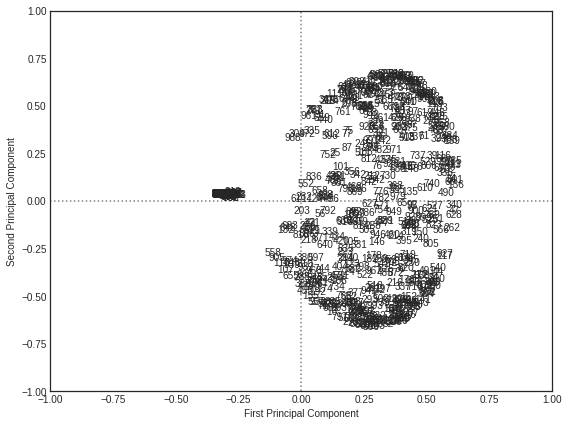

In [22]:
fig , ax1 = plt.subplots(figsize=(9,7))

ax1.set_xlim(-1,1)
ax1.set_ylim(-1,1)

# Plot Principal Components 1 and 2
for i in kpca2_df_plot.index:
    ax1.annotate(i, (kpca2_df_plot.PC1.loc[i], -kpca2_df_plot.PC2.loc[i]), ha='center')

# Plot reference lines
ax1.hlines(0,-1,1, linestyles='dotted', colors='grey')
ax1.vlines(0,-1,1, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')

5. Repeat 1-3 for half moon data. 

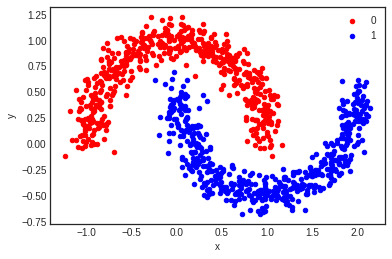

In [23]:
X, y = make_moons(n_samples=1000, noise=0.1)
# scatter plot, dots colored by class value
moons_df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = moons_df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [24]:
kpca3 = KernelPCA(n_components=2, kernel='rbf', gamma=5)

# Fit the PCA model and transform df to get the principal components
kpca3_df_plot = pd.DataFrame(kpca3.fit_transform(moons_df), columns=['PC1', 'PC2'], index=moons_df.index)
kpca3_df_plot

,PC1,PC2
0,-0.174141,0.467886
1,0.474485,-0.115763
2,-0.070487,0.217055
3,-0.276621,-0.495670
4,0.142672,-0.066420
...,...,...
995,0.344345,0.081449
996,0.522945,-0.108714
997,0.092549,0.093766
998,0.405901,0.040005


Text(0, 0.5, 'Second Principal Component')

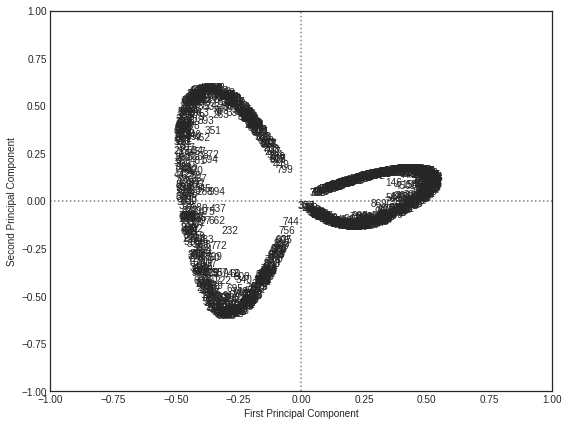

In [25]:
# scaled PCA viz
fig , ax1 = plt.subplots(figsize=(9,7))

ax1.set_xlim(-1,1)
ax1.set_ylim(-1,1)

# Plot Principal Components 1 and 2
for i in kpca3_df_plot.index:
    ax1.annotate(i, (kpca3_df_plot.PC1.loc[i], -kpca3_df_plot.PC2.loc[i]), ha='center')

# Plot reference lines
ax1.hlines(0,-1,1, linestyles='dotted', colors='grey')
ax1.vlines(0,-1,1, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')

### Task 3: 
Iterative Algorithm for Matrix Compeletion
1. Implement Algorithm 12.1

2. Recreate Fig 12.5 (Missing Value Imputation on US Arrest Data using Algorithm 12.1). Please make sure you mimic different missing points than that in the book. You can do so by choosing a different seed for a random number generator. 

In [60]:
# Convert dataframe into matrix
X = np.matrix(X_scaled)
pca = PCA(X)
pca

PCA(n_components=matrix([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
        [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
        [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
        [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
        [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
        [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
        [-1.04088037, -0.73648418,  0.79976079, -1.092723...
        [ 1.13921666,  0.36654512,  1.00912225,  0.46029832],
        [-1.06407289, -0.61527217,  1.00912225,  0.17989166],
        [-1.29599811, -1.48799864, -2.34066115, -1.08193832],
        [ 0.16513075, -0.17890893, -0.17725937, -0.05737552],
        [-0.87853272, -0.31224214,  0.52061217,  0.53579242],
        [-0.48425985, -1.08799901, -1.85215107, -1.28685088],
        [-1.20322802, -1.42739264,  0.03210209, -1.1250778 ],
        [-0.22914211, -0.11830292, -0.38662083, -0.60740397]]))

In [176]:
# Singular value decomposition
u, d, v = np.linalg.svd(X, full_matrices=False) # u,d,v where v contains the loading matrix
sX = np.dot(u, np.dot(np.diag(d), v))

# u is the matrix of standardized scores, d is the standard deviations
# Recover the score vectors
transpose(sX[1] * transpose(sX[0]))
pca.n_components

matrix([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
        [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
        [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
        [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
        [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
        [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
        [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
        [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
        [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
        [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
        [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
        [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
        [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
        [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
        [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
        [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
        

In [127]:
# To illustrate using PCA for matrix completion
# Omit 20 entries of the 50x2 data matrix at random
nomit = 20
random.seed(16)
ina = []
inb = []
for i in range(0, 20):
    ina.append(random.randint(1, 50))
    inb.append(random.randint(1, 4))
#print(ina)
#print(inb)
Xna = X_scaled
index_na = list(zip(ina, inb)) # two column matrix with columns ina and inb
#print(index_na)

In [175]:
# Use svd for illustration, but could use pca
# Write a function that takes a matrix and returns an approximation to the matrix using svd
def fit_svd(X, M=1):
  svd_approx = svd(X)

In [184]:
from numpy.ma.extras import column_stack
# Initialize X-hat by replacing the missing values with the column means of non-missing entries
Xhat = Xna
xbar = Xna.mean(axis=0)